# Natural Computing

## Exercises on Evolutionary Computation


### Exercise 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
l = 100 # bit string length
p = 1 / l # mutation rate

iters = 1500 # number of iterations
runs = 10 # number of runs

In [3]:
def bit_flip(x):
    test = np.random.uniform()
    if test < p:
        x ^= 1 # XOR
    return x

In [118]:
def counting_ones(l, p, iters):
    x = np.random.randint(2, size=l) # randomly generate a bit sequence x
    xs = [np.sum(x)] # store fitness

    for i in np.arange(iters):
        x_m = np.array(list(map(bit_flip, x)))
        old_fitness = xs[i]
        new_fitness = np.sum(x_m)
        if new_fitness > old_fitness:
            x = x_m
            xs.append(new_fitness)  
        else:
            xs.append(old_fitness)
            
    return xs

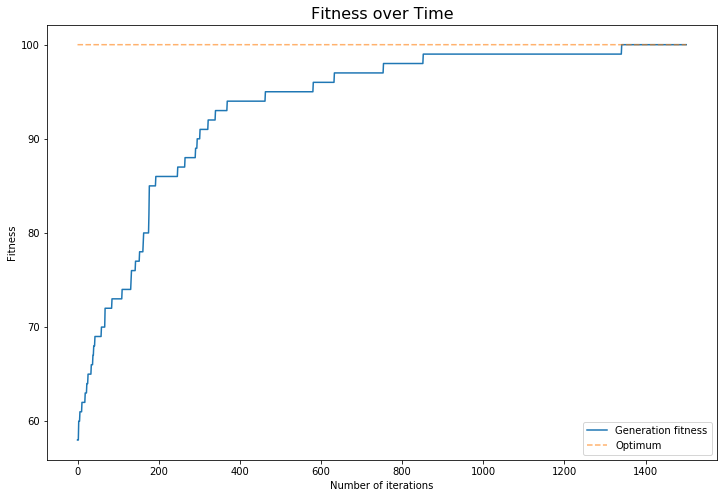

In [119]:
# 4a
generations = counting_ones(l, p, iters)

plt.figure(figsize=(12,8))
plt.plot(np.arange(iters+1), generations, label="Generation fitness")
plt.plot(np.arange(iters+1), [100] * (iters+1), '--', alpha=0.6, label="Optimum")
plt.xlabel("Number of iterations")
plt.ylabel("Fitness")
plt.title("Fitness over Time", fontsize=16)
plt.legend()
# plt.savefig("figures/ex4a.png")
plt.show()

In [138]:
# 4b
opt = l # optimum of Counting Ones problem
count_opt = 0
for _ in np.arange(runs):
    generations = counting_ones(l, p, iters)
    if np.amax(generations) == opt:
        count_opt += 1

print(f"Optimum count: {count_opt}/{runs}")

Optimum count: 9/10


In [103]:
# 4c
def counting_ones_(l, p, iters):
    x = np.random.randint(2, size=l) # randomly generate a bit sequence x
    xs = [np.sum(x)] # store fitness

    for i in np.arange(iters):
        x_m = np.array(list(map(bit_flip, x)))
        new_fitness = np.sum(x_m)
        x = x_m
        # add best fitness
        if new_fitness > xs[i]:
            xs.append(new_fitness) 
        else:
            xs.append(xs[i])
            
    return xs

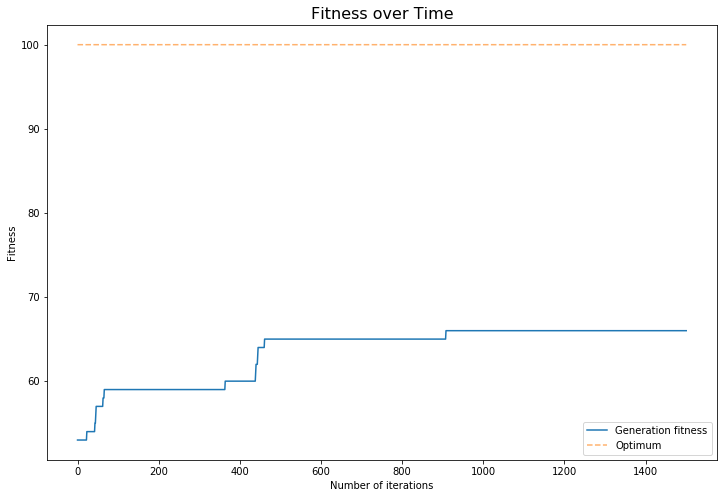

In [110]:
generations = counting_ones_(l, p, iters)

plt.figure(figsize=(12,8))
plt.plot(np.arange(iters+1), generations, label="Generation fitness")
plt.plot(np.arange(iters+1), [100] * (iters+1), '--', alpha=0.6, label="Optimum")
plt.xlabel("Number of iterations")
plt.ylabel("Fitness")
plt.title("Fitness over Time", fontsize=16)
plt.legend()
# plt.savefig("figures/ex4c.png")
plt.show()

In [139]:
opt = l # optimum of Counting Ones problem
count_opt = 0
max_in_runs = []
for _ in np.arange(runs):
    generations = counting_ones_(l, p, iters)
    if np.amax(generations) == opt:
        count_opt += 1
    max_in_runs.append(generations[-1])
    

print(f"Optimum count: {count_opt}/{runs}")
print(f"Max fitness over runs: {max_in_runs}")

Optimum count: 0/10
Max fitness over runs: [61, 61, 64, 64, 65, 67, 65, 64, 62, 63]
